# Exploring the patterns of successful games

You work at Streamchik, an online store that sells computer games worldwide. Historical data on game sales, user and expert ratings, genres and platforms (e.g. Xbox or PlayStation) are available from open sources. You need to identify the patterns that determine a game's success. This will allow you to bet on a potentially popular product and plan advertising campaigns.

What you have in front of you is data through 2016. Let's imagine it's December 2016 and you're planning a campaign for 2017. You need to work out how to work with the data. It doesn't matter if you're forecasting sales for 2017 based on 2016 data or 2027 based on 2026 data.

In the data set comes the acronym ***ESRB (Entertainment Software Rating Board)***, which is the association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age rating, such as "For adults", "For young children" or "For teens".

**Description of data in the dataframe:**
* ***Name*** - name of the game
* ***Platform*** - platform
* ***Genre*** - game genre
* ***NA_sales*** - North American sales (millions of copies sold)
* ***EU_sales*** - European sales (millions of copies sold)
* ***JP_sales*** - sales in Japan (millions of copies sold)
* ***Other_sales*** - sales in other countries (millions of copies sold)
* ***Critic_Score*** - critics score (max. 100)
* ***User_Score*** - users rating (maximum 10)
* ***Rating*** is a rating from the ESRB (Entertainment Software Rating Board). This association rates computer games and assigns them an appropriate age rating.

**Plan of work for this project:**
- Examine the data in the table, identify anomalies and missing values.
- Perform data preprocessing: replacing columns, filling in gaps, removing duplicates, etc.
- Perform analysis on the tasks set and prepare up-to-date data.
- Create user portraits for purchased sales regions.
- Perform hypothesis testing.
- Summarize the conclusions of the project.

### Exploring general information in the data

In [1]:
# Import the libraries needed for the study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Open file
data = pd.read_csv('/content/games.csv')
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2996,Return to Castle Wolfenstein: Tides of War,XB,2003.0,Shooter,0.49,0.16,0.00,0.02,84.0,8.8,M
6219,SimCity 2000,SAT,1994.0,Simulation,0.00,0.00,0.28,0.00,NaN,NaN,NaN
4446,Eternal Darkness: Sanity's Requiem,GC,2002.0,Adventure,0.34,0.09,0.00,0.01,92.0,8.7,M
15664,Bakumatsu Rock: Ultra Soul,PSV,2014.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
14376,Vegas Casino,DS,2007.0,Misc,0.03,0.00,0.00,0.00,NaN,tbd,T
3370,NHL 15,PS4,2014.0,Sports,0.31,0.19,0.00,0.10,60.0,3.6,E10+
6202,Yu-Gi-Oh! World Championship 2008,DS,2007.0,Strategy,0.13,0.02,0.12,0.01,NaN,NaN,NaN
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,4.34,2.71,3.96,0.76,NaN,NaN,NaN
6402,AC/DC LIVE: Rock Band Track Pack,Wii,2008.0,Misc,0.24,0.00,0.00,0.02,NaN,7.2,T
5650,NBA 2K3,XB,2002.0,Sports,0.24,0.07,0.00,0.01,87.0,7.9,E


In [3]:
# display general information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# function that visualizes the number of gaps
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(10,5), rot = -5, legend = False, fontsize = 16)
            .set_title('Gaps in data' + "\n", fontsize = 15, color = 'SteelBlue')    
        );    
    except:
        print('There are no gaps left :) ')

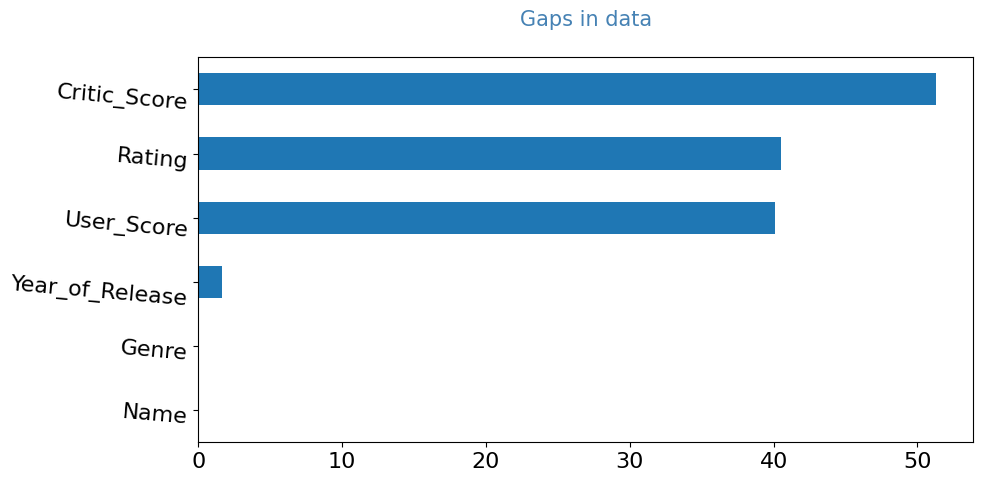

In [5]:
pass_value_barh(data)

In [6]:
# display unique values for user_score
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# output the lines with gaps in user_score
data[data['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
# display the rows with 0 user rating
data[data['User_Score'] == '0']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In [9]:
#  output the rows with gaps in name
data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# count the number of each game in the dataframe
data['Name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

In [11]:
data[data['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [12]:
# output the rows with gaps in year_of_score
data[data['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# display the unique values of the genre
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [14]:
# display the rows with gaps in genre
data[data['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
# display the unique values of the critic_score
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [16]:
# display the rows with gaps in critic_score
data[data['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
# display the rows with gaps in rating
data[data['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


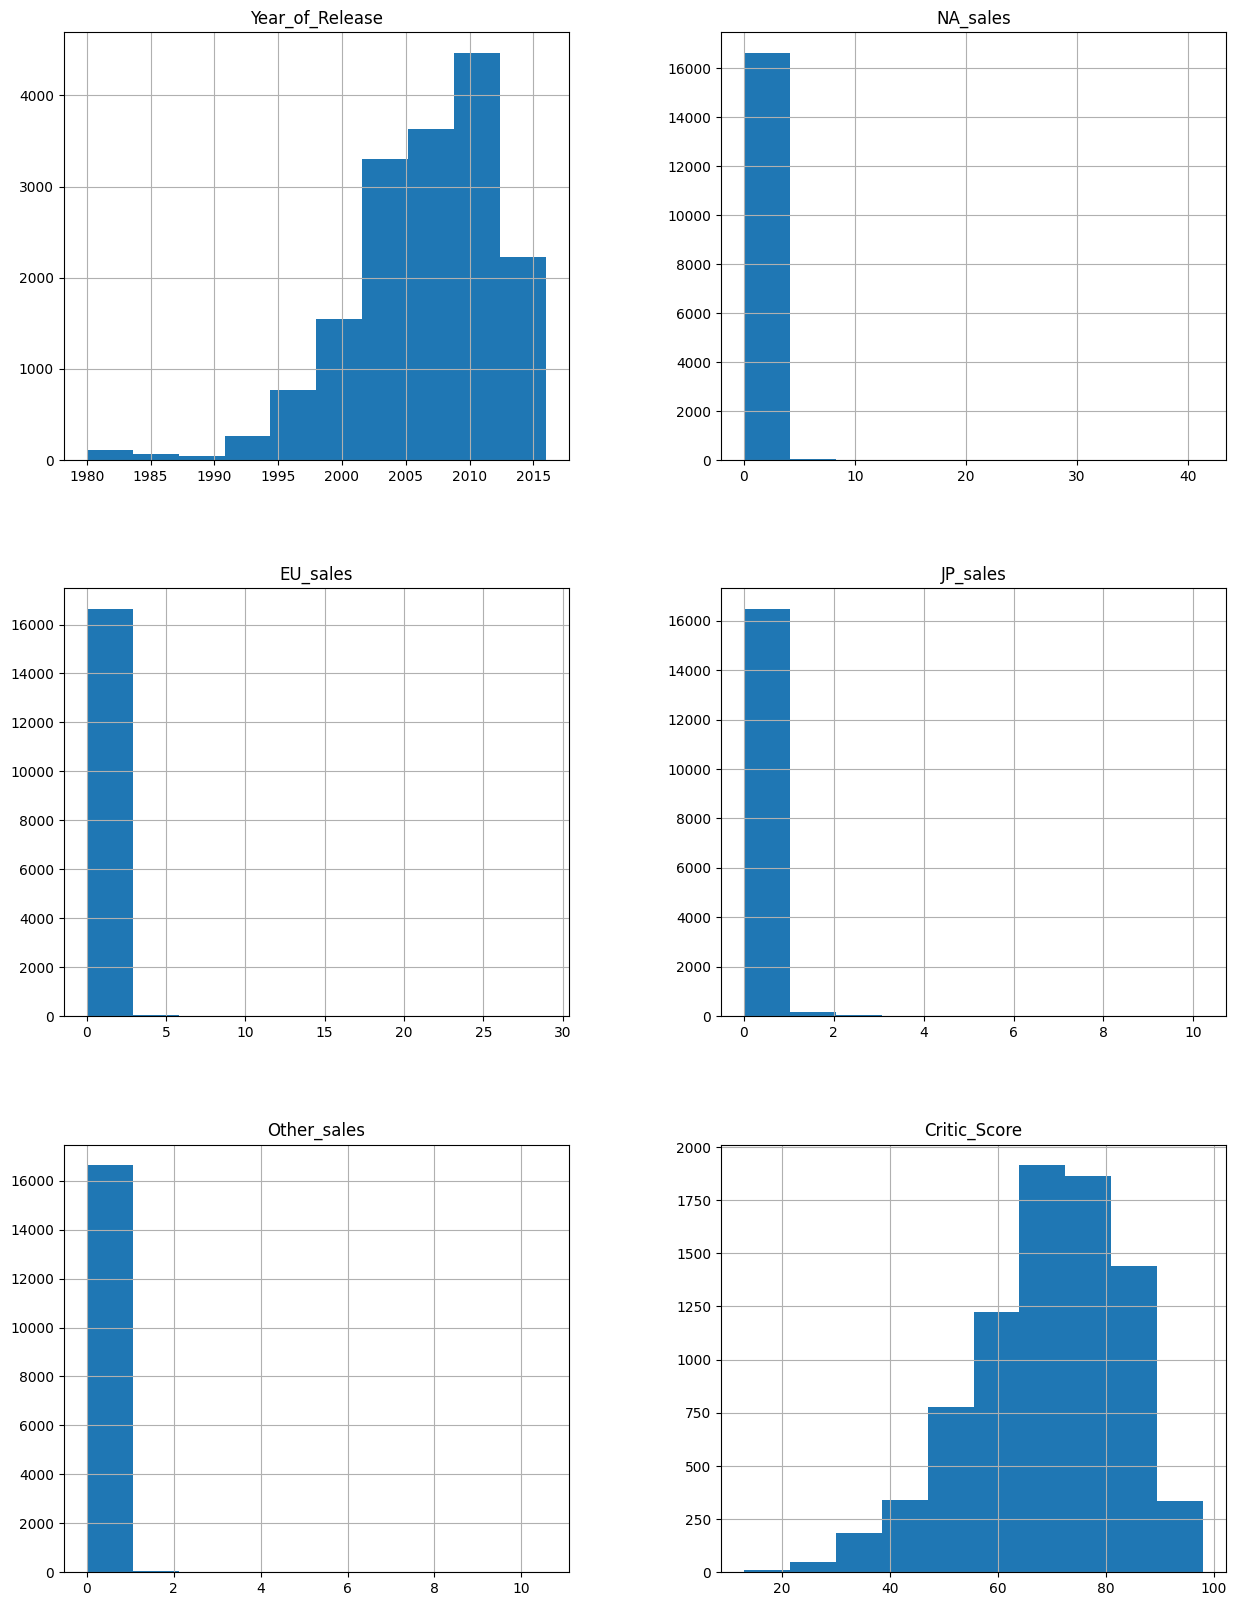

In [18]:
# let's build histograms for the whole table
data.hist(figsize=(15, 20));

***Conclusion:***

**Variable types:**


* Categorical: `name`, `platform`, `genre`, `rating`.
* Quantitative: `year_of_release`, `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `critic_score`, `user_score`.


**The following anomalies are detected:**


* Missing columns: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.
* The tbd value in the `user_score` column means there is no score at the time of data unloading. Computer games are not rated by players and experts right after release. Some amount of time must pass.
* Invalid data type in `year_of_release` column. Year is an integer.


**Random anomaly type:**


* Gaps in the name and genre columns. The year and platform data is found to duplicate the same game. One row holds sales data for Europe and America, while the second row holds sales data for Japan only.
* Gap in the `year_of_release`.


**Non-random anomaly type:**


* Gaps in the `critic_score`, `user_score`, and `rating` columns. 

Computer games are not rated immediately after release, there may be cases where games are not rated at all, so major game rating agencies do not have the ability to leave ratings. Following this, there may be no player scores and ESRB scores.

### Preprocessing data

#### Fixing header errors

In [19]:
# display column names
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [20]:
# rename columns
new_columns = [column.lower() for column in data.columns]
data.columns = new_columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Fixing data gaps

Previously, we identified rows with gaps in the name and genre columns, which duplicate the same game - lines 659 and 14244. We will delete these lines, as it is impossible to fill information on these columns.

In [21]:
# remove the previously identified lines
data.drop([659, 14244],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's move on to the gaps in the `year_of_release` column. 

From the obtained data, we can see that some game titles have the year, but it is important to understand that for some genres, namely Sports, Racing, Fighting, i.e. sports games, the year in the title means the end of the game season. It turns out that if the year 2006 is specified in the title, the game covers the 2005-2006 game season, which means that the release of the game falls on the year 2005.

This allows us to partially restore the gaps in the `year_of_release` column.

In [22]:
# write a function to fill in the year_of_release based on the data in the name and genre
def year_of_release(row):
    year = 0
    last_word = ''
    genre = row['genre']
    for word in row['name'].split():
        try:
            last_word = word
            year = int(word)
        except:
            continue
    if genre in ('Sports', 'Racing', 'Fighting'):
        if year > 2000 or last_word in ('2K6','2K8'):
            if genre == 'Sports':
                year -=1
            if last_word == '2K6':
                year = 2005
            elif last_word == '2K8':
                year = 2007
            if year < 2017 and np.isnan(row['year_of_release']):
                row[2] = year
    return row

data = data.apply(year_of_release, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16462 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's look at the remaining rows with gaps in the `year_of_release` column that cannot be filled.

In [23]:
# examine the remaining gaps in the year_of_release
year_of_release = data['year_of_release'].isna().sum() / data['year_of_release'].isna().count()
print('Percentage of gaps in year_of_release:', round(year_of_release * 100, 2))

# delete rows with gaps in the year_of_release
data = data.dropna(subset=['year_of_release'])

Percentage of gaps in year_of_release: 1.5


***Findings for the `year_of_release`:***

The percentage of lines with gaps in the data for the `year_of_release` column is 1.5% in the whole dataframe. This is a small amount of data, further study will not be affected by their deletion. The reason for deletion is impossibility to fill the remaining rows.

In [24]:
# examine the unique values in the critic_score
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [25]:
# examine rows with gaps in critic_score
data.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
critic_score = data['critic_score'].isna().sum() / data['critic_score'].isna().count()
print('Percentage of gaps in critic_score:', round(critic_score * 100, 2))

Percentage of gaps in critic_score: 51.42


***Findings for the `critic_score`:***

We see that the gaps in the `critic_score` column make up half of all the data - 51.42%, we cannot delete them. We also can't fill in the scores, so we'll leave these gaps unchanged.

In [27]:
# examine the unique values in the user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [28]:
# examine the number of gaps
user_score = data['user_score'].isna().sum() / data['user_score'].isna().count()
print('Percentage of gaps in user_score:', round(user_score * 100, 2))

Percentage of gaps in user_score: 40.15


In [29]:
# Replace tbd with NaN and convert the data type
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype('float32')

***Findings from the `user_score`:***

After examining the unique values in the `user_score` column, we see that there are tbd (to be determined) values, which mean that the scores have not yet been assigned, which means that these rows can be replaced with `NaN`, as we cannot get the data from anywhere.

As with the `critic_score`, the percentage of gaps in the `user_score` is more than half of the entire dataset, namely 40.15%, we can not replace the values, so we leave them as they are.

In [30]:
# examine unique values in the rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In the `rating` column we see the values: K-A and E10+ - these are two identical values, old and new ones. Originally K-A stands for 'kids to adults', later it was renamed to E10+. In this regard, it would be more correct to rename K-A to E10+.

In [31]:
# replace data
data['rating'] = data['rating'].replace('K-A', 'E10+')

In [32]:
# examine the number of gaps
rating = data['rating'].isna().sum() / data['rating'].isna().count()
print('Percentage of gaps in rating:', round(rating * 100, 2))

Percentage of gaps in rating: 40.58


In [33]:
# replace gaps with no_info
data['rating'] = data['rating'].fillna('no_info')

***Findings for the `rating`:***

We have seen that the gaps in the column rating make up 40.58% of all data in the dataset, which is a lot, we cannot delete them and fill them in as well. So let's replace the gaps with value: no_info.

For further ease of reading the data, let's change the name of the game platforms from abbreviations to full.

In [34]:
# examine the unique values of the platform
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [35]:
# rename the game platforms names
def replace_wrong_platforms(wrong_platforms, correct_platform):
    data['platform'] = data['platform'].replace(wrong_platforms, correct_platform)
    
replace_wrong_platforms('2600', 'Atari 2600')
replace_wrong_platforms('Wii', 'Nintendo Wii')
replace_wrong_platforms('NES', 'Nintendo NES')
replace_wrong_platforms('GB', 'GB-60')
replace_wrong_platforms('DS', 'Nintendo DS')
replace_wrong_platforms('X360', 'Xbox 360')
replace_wrong_platforms('SNES', 'Nintendo SNES')
replace_wrong_platforms('GBA', 'Game Boy Advance')
replace_wrong_platforms('3DS', 'Nintendo 3DS')
replace_wrong_platforms('N64', 'Nintendo 64')
replace_wrong_platforms('XB', 'Xbox')
replace_wrong_platforms('XOne', 'Xbox One')
replace_wrong_platforms('WiiU', 'Nintendo Wii U')
replace_wrong_platforms('GC', 'Nintendo GameCube')
replace_wrong_platforms('GEN', 'SEGA Retro Genesis')
replace_wrong_platforms('DC', 'Dendy Classic')
replace_wrong_platforms('PSV', 'PS Vita')
replace_wrong_platforms('SAT', 'Sega Saturn')
replace_wrong_platforms('WS', 'WonderSwan')
replace_wrong_platforms('TG16', 'NEC TurboGrafx')
replace_wrong_platforms('3DO', 'Panasonic 3DO')
replace_wrong_platforms('GG', 'Game Gear')
replace_wrong_platforms('PCFX', 'NEC PC-FX')

In [36]:
data.shape

(16462, 11)

In [37]:
check = ((16715 - 16462) / 16715) * 100
round(check, 2)

1.51

***Conclusion:***

1. By examining the gaps, we deleted only 1.51% of the data.
2. We left the gaps in the `critic_score` and `user_score` unchanged because the percentage of gaps in the data is about half of the entire dataset, viz: 51.42% and 40.15%, respectively. We cannot replace the gaps, replacing them with the median or the mean is not the right solution, it could very well affect further analysis.
3. We replaced the gaps in the `rating` with "no_info" in order to make it easier to analyze the data later.
4. We removed the gaps in the name and `genre` because the percentage of data with gaps was very small. We cannot replace the gaps, since they are categorical values.
5. We replaced the gaps in the `year_of_release` based on the names of the games where it was possible, the rest of the lines with gaps were deleted.

***Possible reasons for the gaps:***

1. The gaps in the `critic_score`, `rating` can occur for several reasons:
The game was released not so long ago due to which game critics and relevant organizations have not had time to evaluate them, or the games have not been released at all.
2. Gaps in the columns `name`, `year_of_release` most likely appeared due to the fact that either they were forgotten to specify them when entering the data, or the games have not been approved by the official name, a clear release date is planned.
3. Gaps in the `rating` could have arisen because not all players leave their comments, scores on the appropriate sites. Also, the gaps could have occurred because the game was not released or released very recently, which affects the response rate of players.

#### Convert data types

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  float64
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       7473 non-null   float32
 10  rating           16462 non-null  object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.4+ MB


In [39]:
# convert data types in the remaining columns
data['year_of_release'] = data['year_of_release'].astype('int32')

***Conclusion:***

1. Earlier we replaced the data type with float for the `user_score`, as the object data type is not suitable for further analysis - correlation calculation, hypothesis checking etc. There will be an error.
2. We replaced the data type in the `year_of_release` with int, since it is easier to perceive the year as an integer rather than a decimal number.

#### Calculation of total sales in all regions

In [40]:
data['all_regions_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
2253,Knockout Kings 2000,Nintendo 64,1999,Fighting,0.63,0.27,0.00,0.02,NaN,NaN,no_info,0.92
758,Tom Clancy's The Division,Xbox One,2016,Shooter,1.29,0.68,0.00,0.20,80.0,6.9,M,2.17
10245,Avatar: The Last Airbender,PSP,2006,Adventure,0.10,0.00,0.00,0.01,57.0,6.3,E10+,0.11
4123,Grand Prix,Atari 2600,1981,Racing,0.45,0.03,0.00,0.00,NaN,NaN,no_info,0.48
6336,Tohoku Daigaku Karei Igaku Kenkyuusho - Kawash...,Nintendo 3DS,2012,Action,0.00,0.00,0.27,0.00,NaN,NaN,no_info,0.27
2996,Return to Castle Wolfenstein: Tides of War,Xbox,2003,Shooter,0.49,0.16,0.00,0.02,84.0,8.8,M,0.67
16008,Sengoku Efuda Yuugi: Hototogisu Ran,PSP,2008,Misc,0.00,0.00,0.02,0.00,NaN,NaN,no_info,0.02
11765,Gale Racer,Sega Saturn,1994,Racing,0.00,0.00,0.07,0.00,NaN,NaN,no_info,0.07
3317,Game & Watch Gallery 4,Game Boy Advance,2002,Misc,0.43,0.16,0.00,0.01,NaN,NaN,no_info,0.60
15893,Platypus,PSP,2006,Shooter,0.02,0.00,0.00,0.00,59.0,NaN,E,0.02


### Exploratory data analysis

#### Counting the number of games released by year

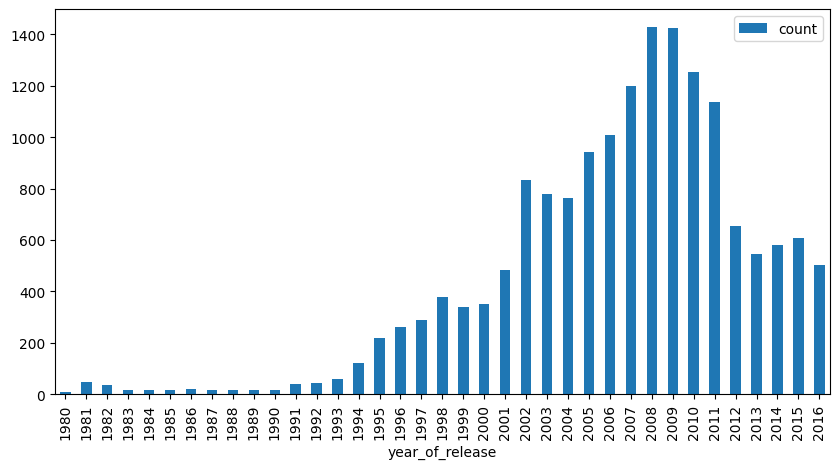

In [41]:
# game release in different years
game_year = (data.pivot_table(index='year_of_release', values='name', aggfunc='count')
             .rename(columns={'name': 'count'}).plot(y='count', kind='bar', figsize=(10, 5)));

Technical progress before 1994 did not allow the development of the game industry, which is reflected in the graph - until 1994, the number of games is extremely small. With the advent of 1994 the situation changes, the infrastructure appears and the industry gets the opportunity to develop. A leap in the number of games released per year occurred in 2002. The peak can be considered 2008-2009. After that a decline can be clearly seen on the Rake. Most likely it is related to the development of mobile devices, digitalization and changes in people's lives (eg development of social networks). Also it is possible that the decline is connected with complication of games production process - longer, more expensive and of higher quality. Since 2012 the number of games released per year has been relatively stable.

So when answering the question whether data for all time periods are important for the analysis, we can say that no, all available periods are not important.

#### Change in sales of game consoles by year

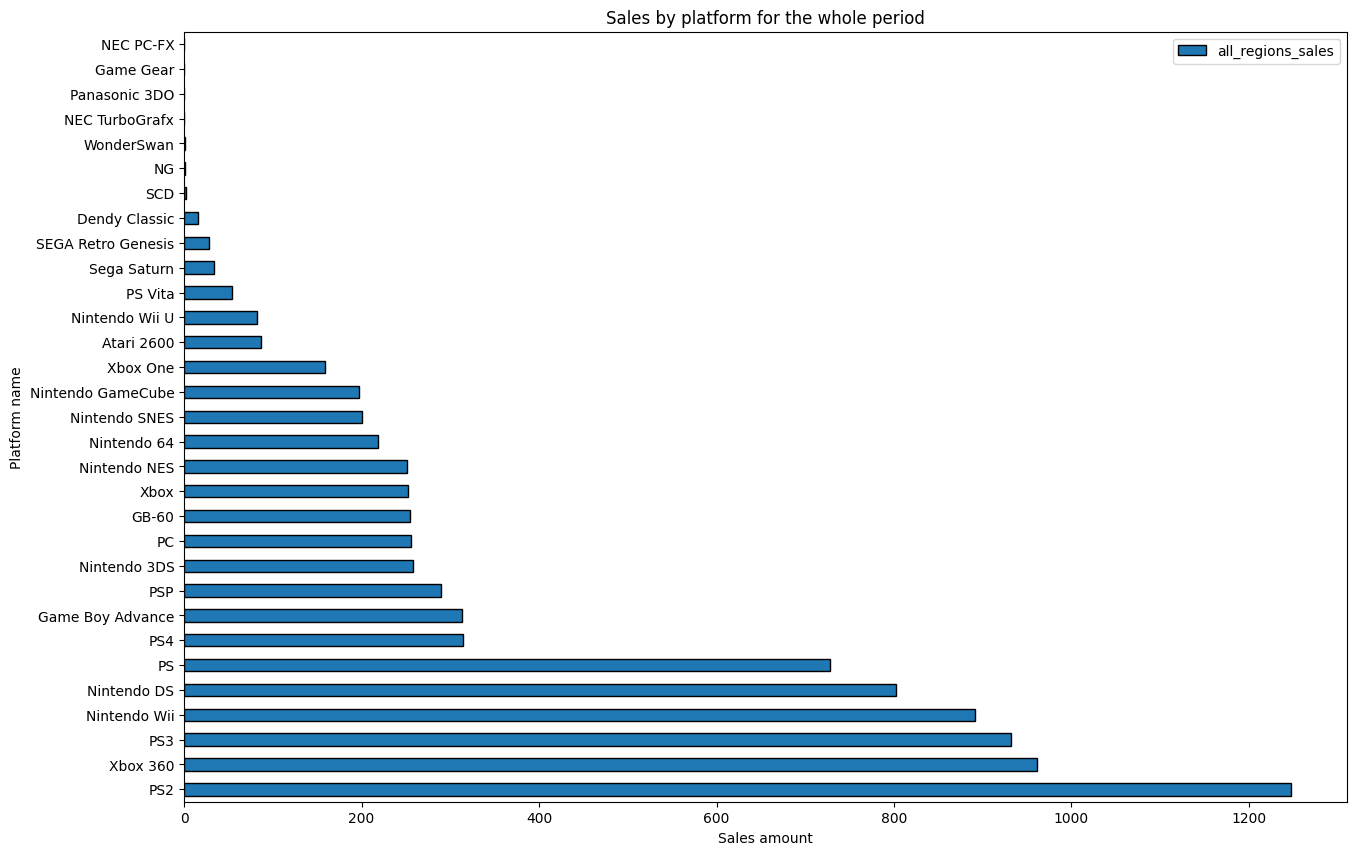

In [42]:
# Consider sales by game platform for the entire period
platform_sales = data.pivot_table(
    index='platform', values='all_regions_sales', aggfunc='sum').sort_values(by='all_regions_sales', ascending=False)

platform_sales.plot(kind='barh', figsize=(15,10), ec='black')
plt.title("Sales by platform for the whole period")
plt.xlabel("Sales amount")
plt.ylabel("Platform name");

Based on the graph we can see that the best-selling platforms are: 
- **PS2**, then comes **Xbox 360**, **PS3**.

Next, we need to choose the platforms with the highest total sales. From the chart above we can see that for analysis we should take the top 6 platforms by sales, because after **PS** there is a significant decline in sales by platform.

In [43]:
# let's bring out the names of the top 6 platforms
top6_platform = list(platform_sales.index[:6])
top6_platform

['PS2', 'Xbox 360', 'PS3', 'Nintendo Wii', 'Nintendo DS', 'PS']

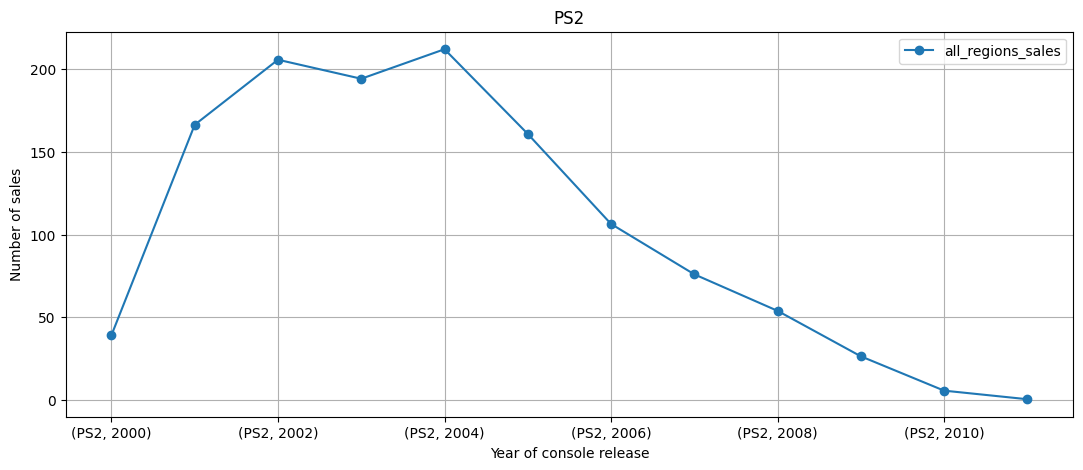

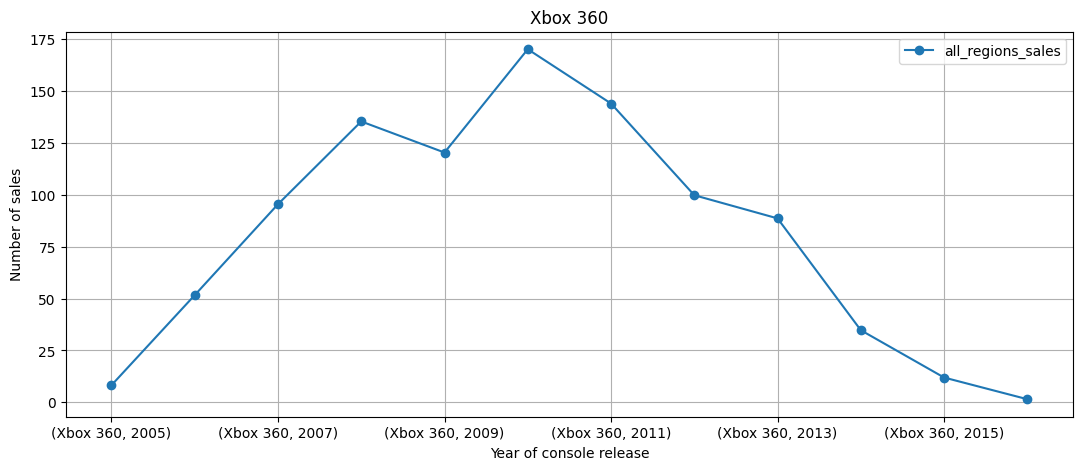

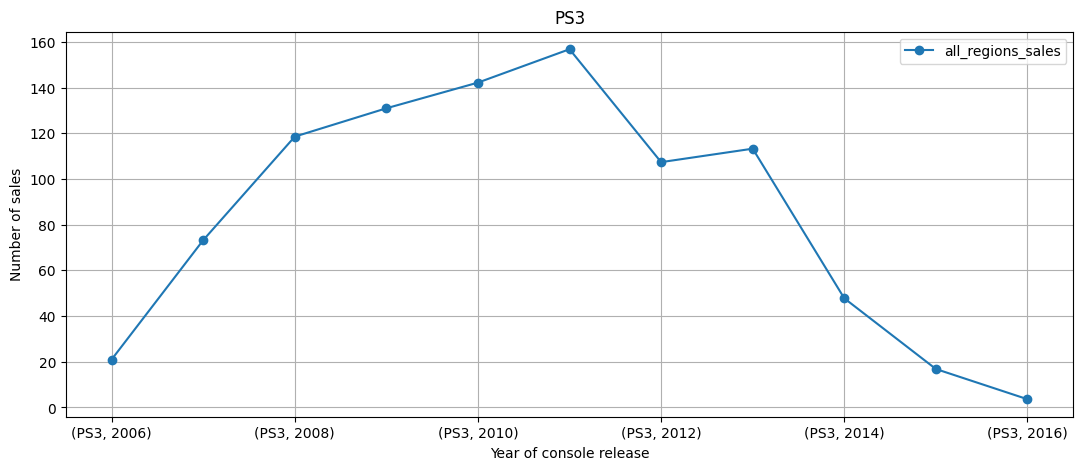

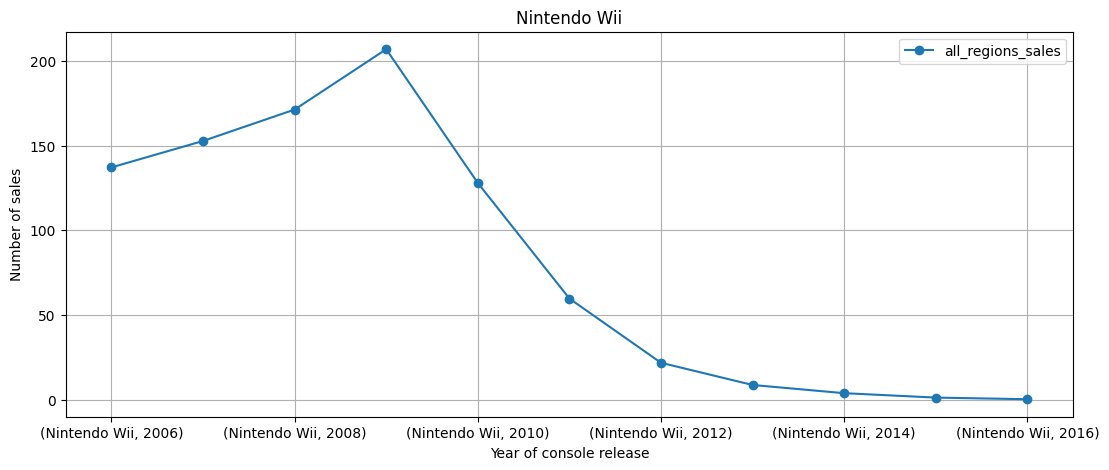

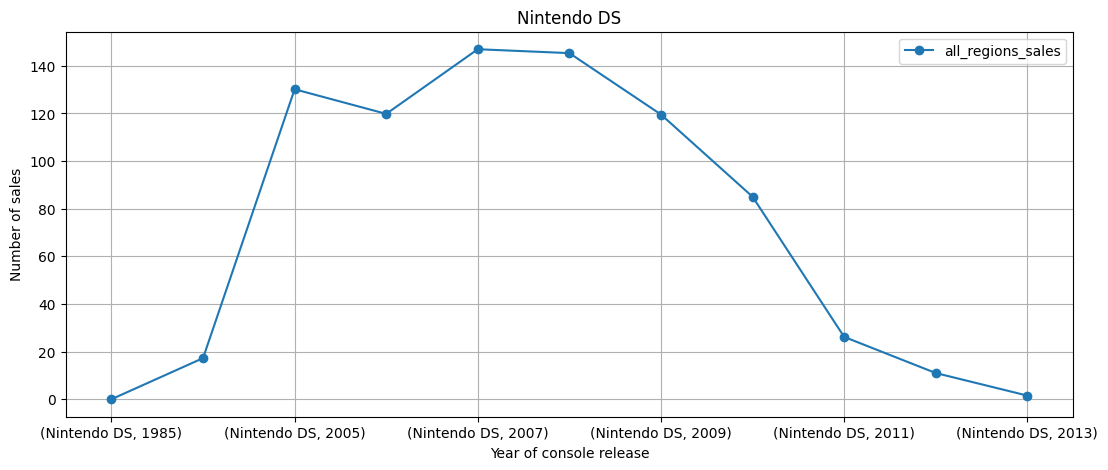

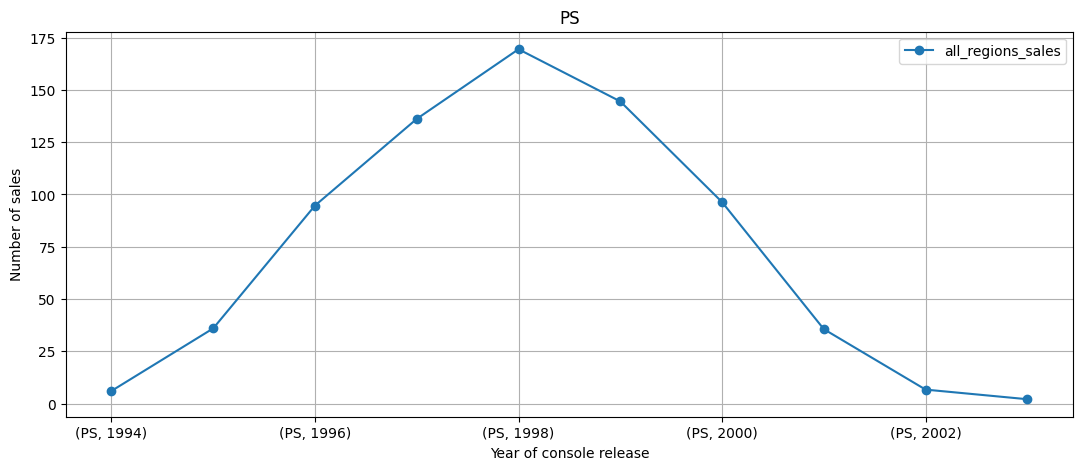

In [44]:
# graphs
for platform in top6_platform:
    platform_pivot = (
        pd.pivot_table(data.query('platform == @platform'), 
                                    index=['platform','year_of_release'], values='all_regions_sales', aggfunc='sum')
    .plot(title=platform, xlabel='Year of console release', ylabel='Number of sales', style='o-', figsize=(13,5), grid=True));

Consider the life cycle of game consoles:

- **PS** - lived from 1994 to 2003, almost 10 years;
- **PS2** - from 2000 to 2011, 11 years;
- **PS3** - still living from 2006 to the present, but started to lose a lot of ground with the release of the PS4 in 2013;
- **Xbox 360** - from 2005 to 2016 - 11 years;
- **Nintendo DS** - started to grow in popularity in 2004, peaking in 2007, end of life in 2013 - 9 active years of life;
- **Nintendo Wii** - from 2006 to the present day, but in 2016 it has almost outlived itself - 10 years again.

So the average console lives 10 years. And it would live longer if newer consoles weren't coming out. But this is inevitable, because progress is moving forward and the hardware in older consoles is no longer able to meet the technical requirements of new games.

#### Game sales forecast for 2017

Let's choose the actual period for which we will study the data for forecasting gaming platform sales for 2017. Based on the data obtained earlier, the actual period can be considered the period from 2005 to 2016, there are several reasons for this:
1. The year 2005 has already released or will soon appear popular game consoles.
2. The period covers the data of all popular game consoles.

Let's build a graph reflecting the dynamics of sales by year and answer the posed question: *What platforms are leading in sales, rising or falling?* Based on the data obtained, let's determine the potentially profitable platforms.

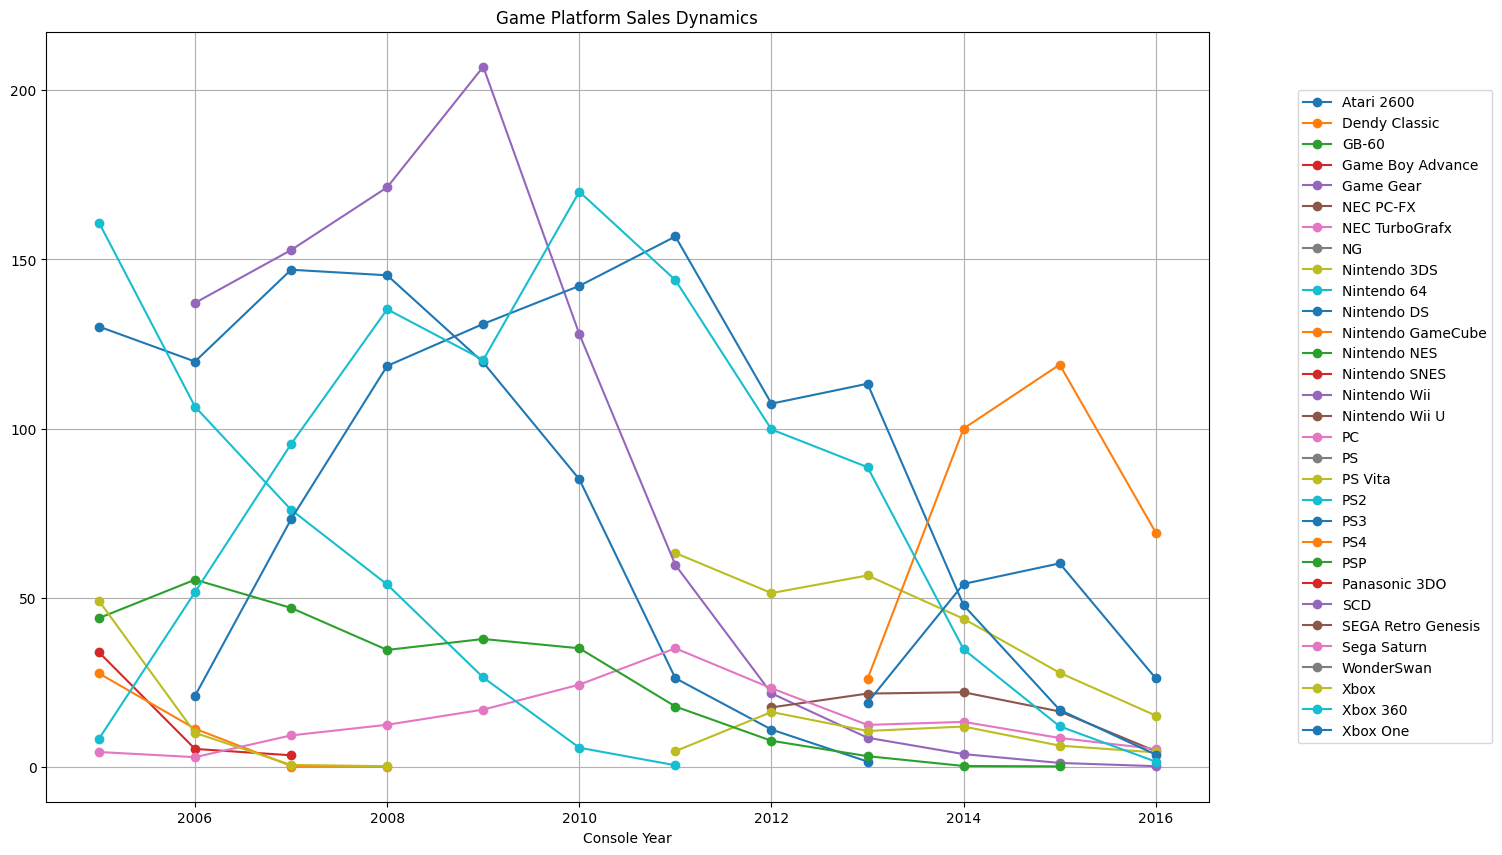

In [45]:
# Let's build a graph reflecting the dynamics of sales for the current years
sales_projection = (
    data.pivot_table(index='year_of_release', columns='platform', values='all_regions_sales', aggfunc='sum')
    .query('year_of_release >= 2005')
    .plot(title='Game Platform Sales Dynamics', xlabel='Console Year', grid=True, figsize=(15,10), style='o-'))
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5));

The resulting graph shows that at the end of 2016 the following platforms are leading in sales:
- **PS4**
- **Xbox One**
- **Nintendo 3DS**

This is the top 3. And, based on the data, the number of sales of games released for each of these platforms is decreasing.

#### Graphing global game sales by platform

In [46]:
# create a variable top6_platforms top 6 platforms and get rid of outliers
list_of_top6 = ['PS2', 'Xbox 360', 'PS3', 'Nintendo Wii', 'Nintendo DS', 'PS']
top6_platforms = data[data['platform'].isin(['PS2', 'Xbox 360', 'PS3', 'Nintendo Wii', 'Nintendo DS', 'PS'])]
top6_platforms = top6_platforms[top6_platforms['all_regions_sales']<1.4]

In [47]:
top6_platforms['all_regions_sales'].describe()

count    8401.000000
mean        0.288881
std         0.305882
min         0.000000
25%         0.070000
50%         0.170000
75%         0.410000
max         1.390000
Name: all_regions_sales, dtype: float64

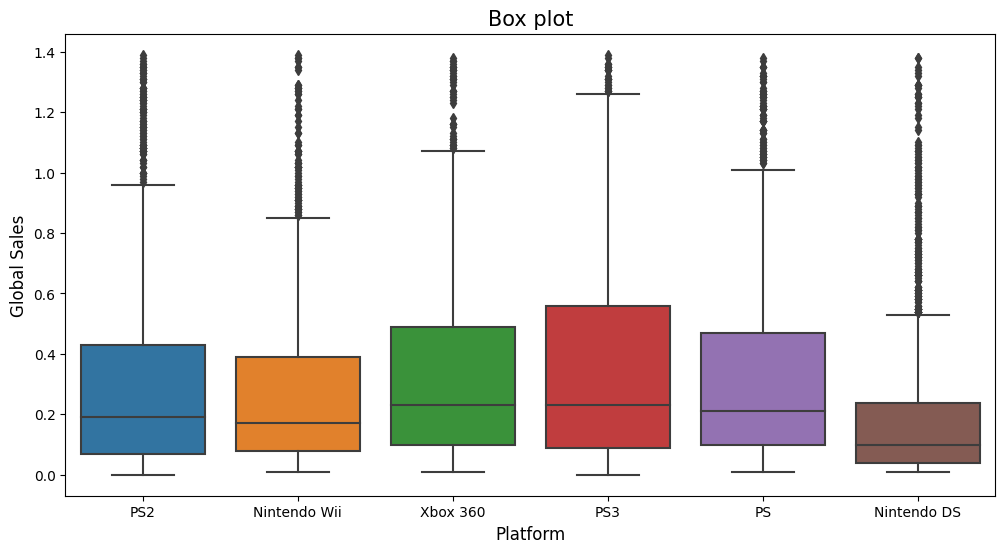

In [48]:
# let's plot
plt.figure(figsize=(12,6))
sns.boxplot(data=top6_platforms, x='platform', y='all_regions_sales')
plt.title('Box plot', fontsize=15)
plt.xlabel('Platform',fontsize=12)
plt.ylabel('Global Sales',fontsize=12);

The following patterns can be seen from the graph: 

- The median for the top 6 platforms ranges from 0.2 million to 0.25 million in revenue per game.
- Two platforms **PS3** and **Xbox 360** have the upper limit, beyond which anomalies are already defined, at 1.2 million.
- The rest have between 0.9 million and 1.1 million.
- The **Nintendo DS** stands out among all of them - it has these indicators are much lower. The median is <0.1 million, the upper limit is 0.5 million.

#### The Impact of User and Critic Reviews on PS3 Sales

Let's take **PS3** as an example - it has been on the market for a long time, there is a lot of data on it, and even at the end of 2016 it is one of the most popular gaming platforms.

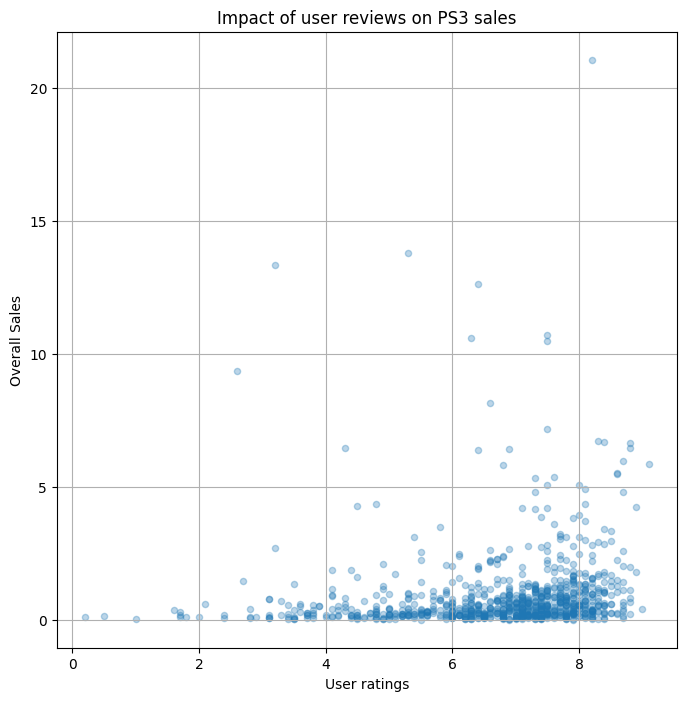

In [49]:
# let's display a scatter table for the PS3 platform, displaying user feedback
ps3 = data[data['platform'] == 'PS3']
ps3.plot(x='user_score', y='all_regions_sales', 
                                     kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.title('Impact of user reviews on PS3 sales')
plt.xlabel('User ratings')
plt.ylabel('Overall Sales');
plt.show()

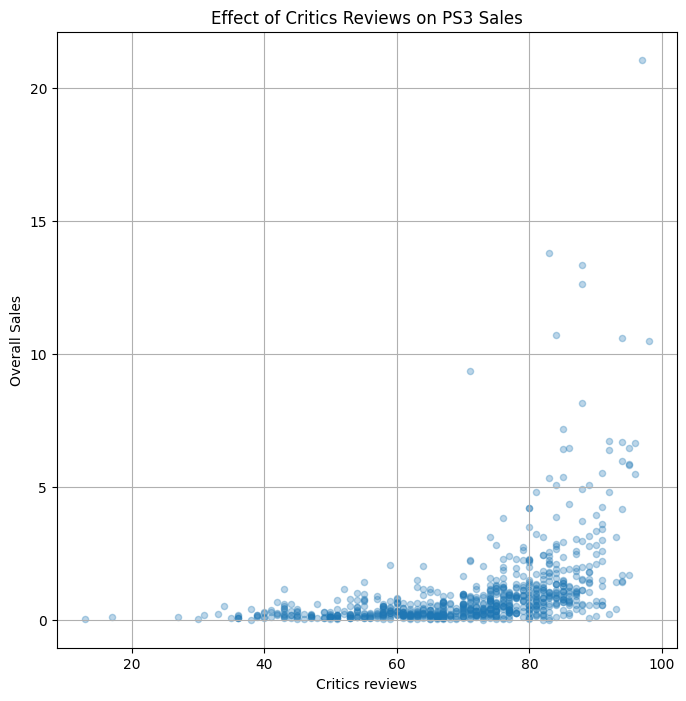

In [51]:
# Let's display a scatter table for the PS3 platform, displaying critics' reviews
ps3.plot(x='critic_score', y='all_regions_sales', 
                                     kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.title('Effect of Critics Reviews on PS3 Sales')
plt.xlabel('Critics reviews')
plt.ylabel('Overall Sales');
plt.show()

From the obtained graphs we see that in both cases the situation is more or less the same: the higher the user or critic reviews on the game, the more money it brings to the developer. But from the graph with user reviews we can see that there are more emissions.

<ipython-input-52-bc12497055c5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ps3.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={'size':16});


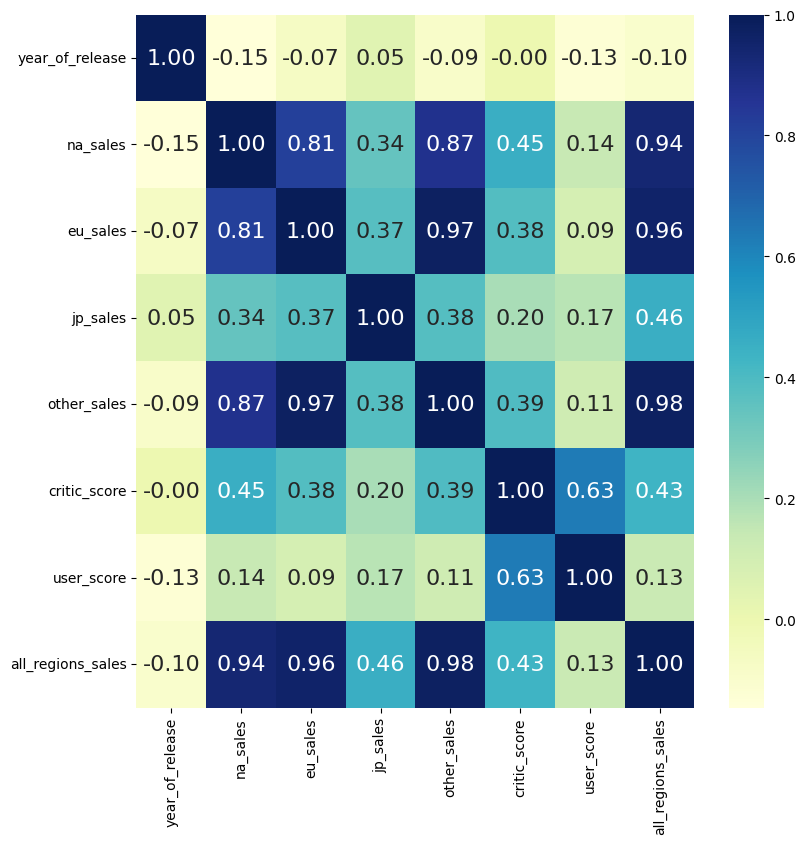

In [52]:
# Let's build a correlation matrix
plt.figure(figsize=(9,9))
sns.heatmap(ps3.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={'size':16});

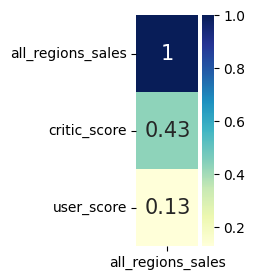

In [53]:
# highlight the columns of interest in the dataset
games_ps3_filtered = ps3[['all_regions_sales' ,'critic_score', 'user_score']]

plt.figure(figsize=(1,3))
sns.heatmap(games_ps3_filtered.corr()[['all_regions_sales']].sort_values(by='all_regions_sales', 
                                                                         ascending=False), cmap="YlGnBu", 
            annot=True, annot_kws={'size':15});

The strongest influence on the final value is the critics' score - the correlation is 0.43. Less, practically unaffected is the users' evaluation, the correlation equals 0.13.

#### The impact of user and critical reviews on the sales of all platforms

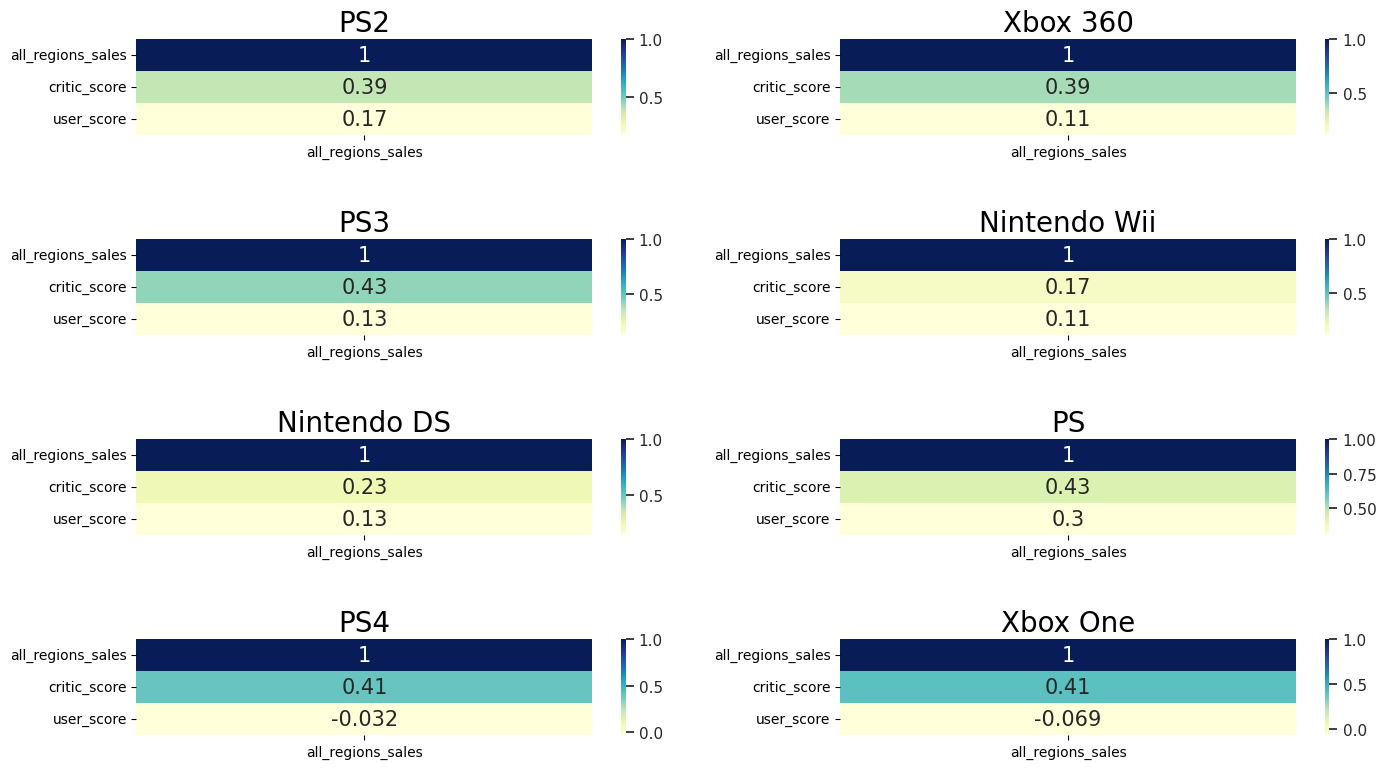

In [54]:
# Let's calculate the correlation for the top 6 platforms
top6_platforms = ['PS2', 'Xbox 360', 'PS3', 'Nintendo Wii', 'Nintendo DS', 'PS', 'PS4', 'Xbox One']

rows = len(top6_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top6_platforms[count]
        df_prep = data[(data['platform'] == curr_platform) & (data['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['all_regions_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['all_regions_sales']].sort_values(by='all_regions_sales', ascending=False), 
                         cmap="YlGnBu", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

The correlation data between revenue and valuation for **PS2**, **Xbox 360**, **PS3**, **PS** and **Xbox One** platforms is more or less the same as the overall dataframe data.
The **Nintendo Wii** and **Nintendo DS** stand out, for which the correlation is not as great.

User ratings have a weaker effect on sales than critics' ratings. Game buyers are more likely to listen to critics than other users, which is likely due to the fact that user evaluations are often subjective and critics' evaluations are not.

As for the **PS4** and **Xbox one** platforms. This generation of new consoles has recently entered the market and most likely because of this users have not yet had time to leave a large number of reviews.

#### Genre distribution of games

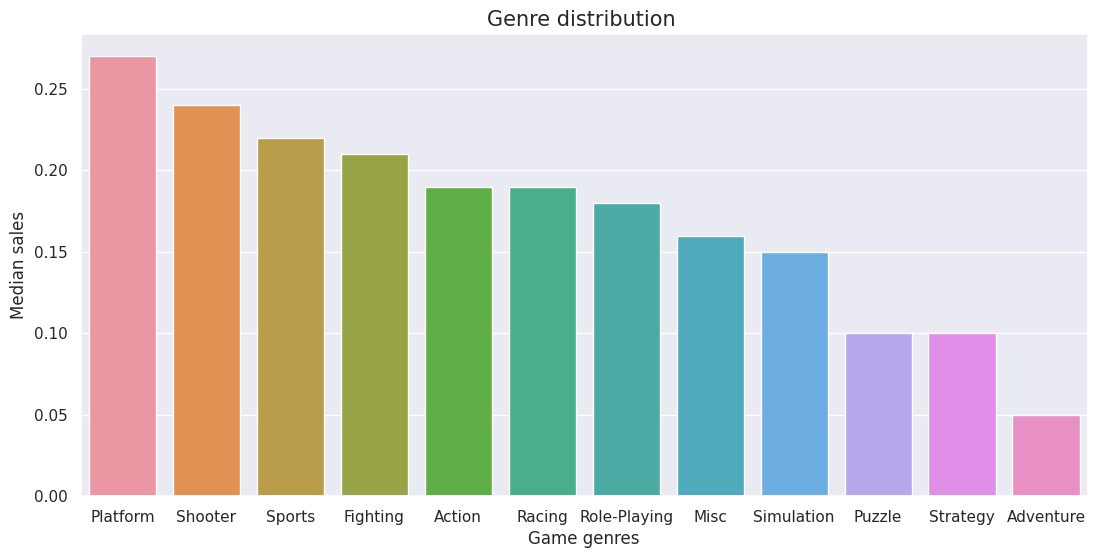

In [55]:
# Let's sort the data by game genre and its median sales
pivot_genre = data.pivot_table(
    index='genre', values='all_regions_sales', aggfunc='median').sort_values(by='all_regions_sales', ascending=False)
pivot_genre = pivot_genre.reset_index().rename_axis(None, axis=1)

# Let's graph the results
plt.figure(figsize=(13,6))
plt.title('Genre distribution ',fontsize=15)
sns.barplot(data=pivot_genre, x='genre', y='all_regions_sales')
plt.xlabel('Game genres',fontsize=12)
plt.ylabel('Median sales',fontsize=12);

The most profitable genres:
- **Platform**
- **Shooter**
- **Sports**
- **Fighting**

Less profitable genres:
- **Simulation**
- **Puzzle**
- **Adventure**
- **Strategy**

The top profitable genres are due to several factors:
* large number of players. Shooters, sports and role-playing games are team games where players compete with each other in different formats: 1x1, 2x2, 3x3, 5x5 etc., respectively, a large number of users must be involved in the game.
* gameplay complexity, plot and design. Action games and role-playing games often attract players by their quality, gameplay, story and design, which often allows you to replay the game several times, returning to them more and more often.
* Availability to a wide audience. 

By the number of sales the following genres are leading:
- **Action**
- **Sports**
- **Misc**
- **Role-Playing**


**General conclusion from the exploratory data analysis:**

All of the questions posed have been answered and the reasoning is supported by reasoning.

The generalized conclusion for 2017 is that sales are expected to climb on the new generation of game consoles, namely: **PS4**, **Xbox One** and **Nintendo 3DS**. These platforms open up new opportunities for development studios.

### User portrait of each region

#### Portrait of regional users (NA, EU, JP)

For ease of data analysis, write a function that visualizes the sales of game consoles by region.

In [56]:
# function
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North American sales', 'eu_sales': 'European sales', 'jp_sales': 'Japanese sales'}
    color_dict = {'na_sales': 'black', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

#### Determining the top 5 most popular platforms in the regions

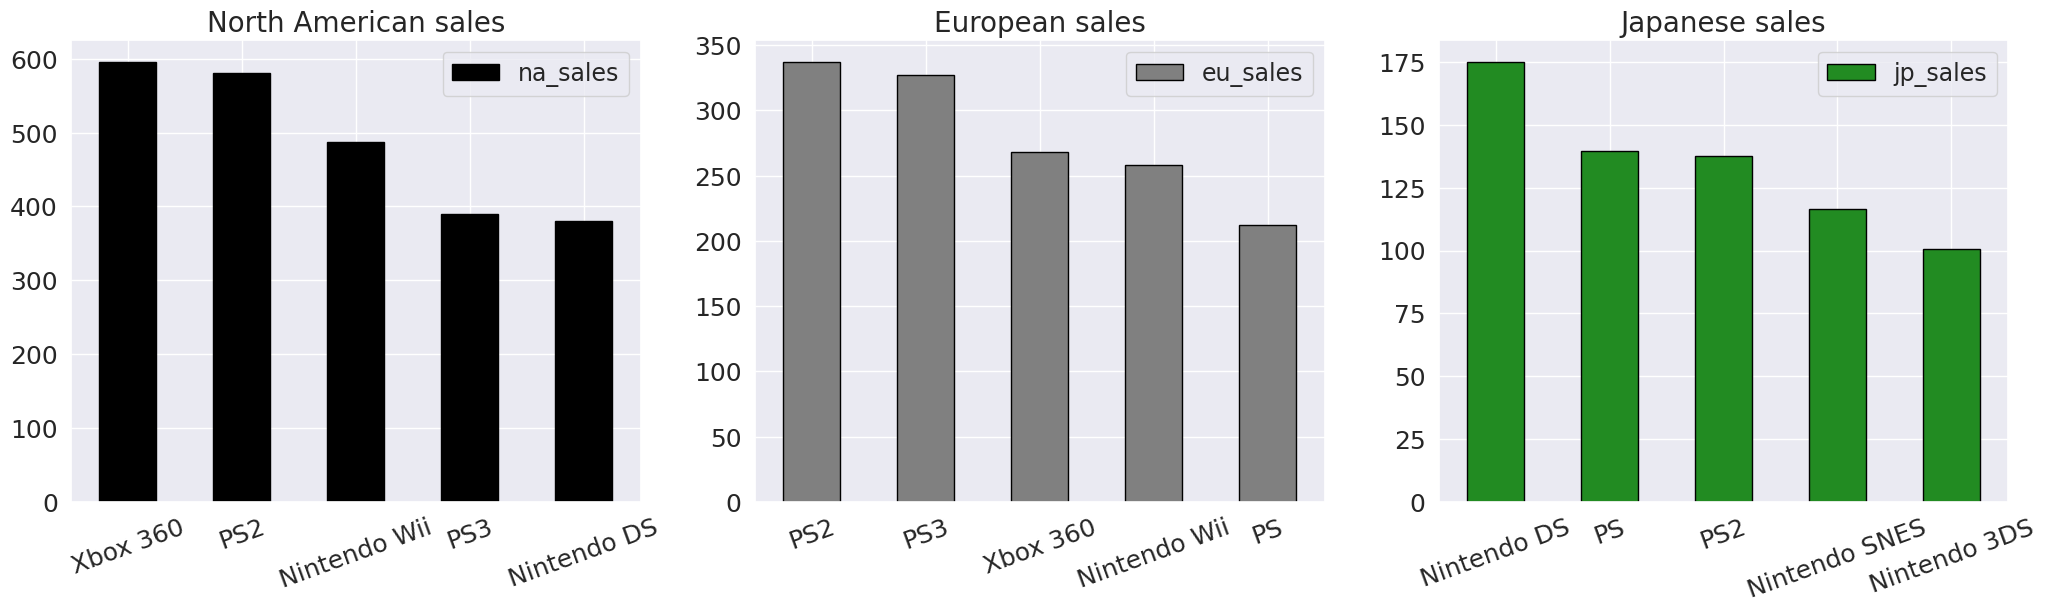

In [57]:
# visualization of the top 5 consoles in different regions in terms of sales
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

The following is evident from the graphs we received:

The best-selling consoles in *North America* are **Xbox 360** and **PS2**, followed by **Nintendo Wii**, with **PS3**, **Nintendo DS** lagging far behind.

The best-selling consoles in *Europe* are **PS2**, **PS3** - they have almost the same popularity with users. They are followed by **Xbox 360**, **Nintendo Wii**, **PS** with a slight lag.

The best-selling consoles in *Japan*, as expected, are Japanese-made. The leader is **Nintendo DS**, then American **PS**, **PS2** are lagging behind, while Japanese **Nintendo SNES**, **Nintento 3DS** are topping the top-5.

#### Determining the top 5 genres by popularity in the regions

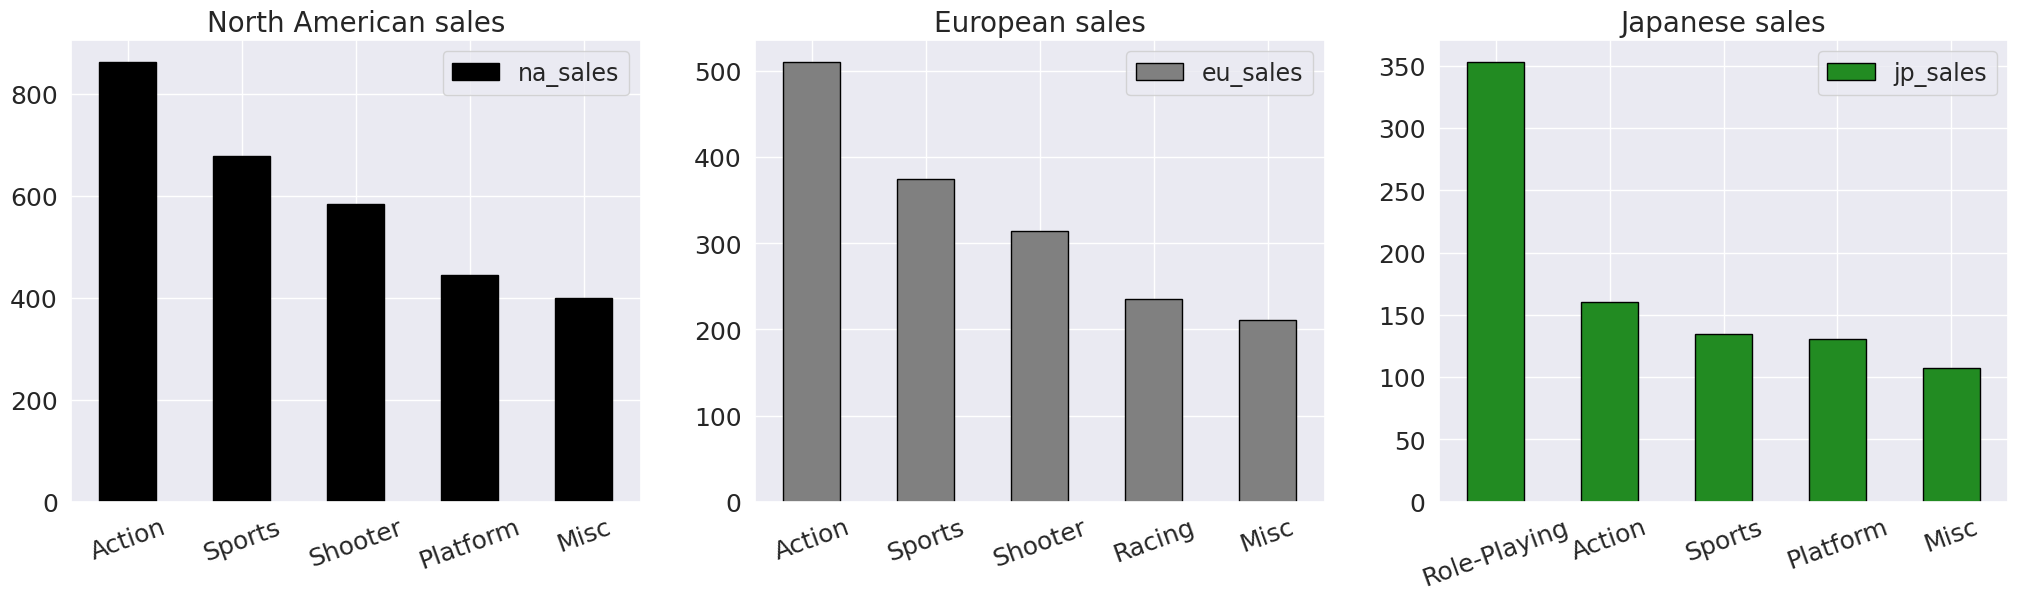

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

We can see the following from the obtained graphs:

*North American* and *European* users prefer the same genres of games, namely: **Action**, **Sports**, **Shooter** - these genres take the leading positions in the top 5, the leader is the same: **Action**. The difference between these regions is that *North American* users also prefer playing **Platformers**, while *European* users prefer **race**.

In *Japan*, the situation is different. Users prefer to play **role-playing games**, by a very wide margin. Next in the ranking are **Action**, **Sports**, **Platform**, **Misc**.

#### Determining the impact of ESRB rating on platform sales in the regions

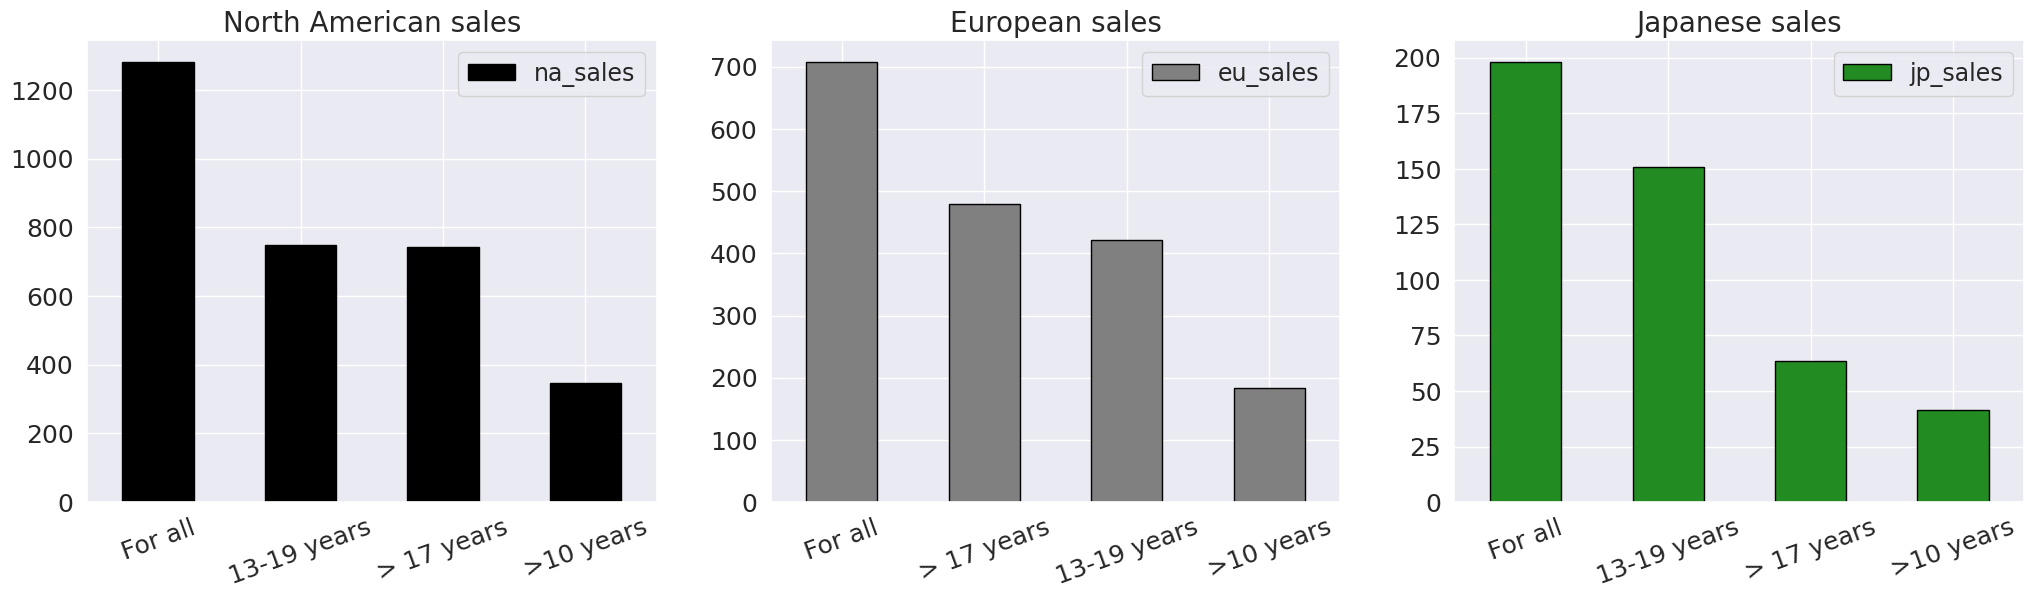

In [59]:
# let's create a dictionary with the ESRB rating labels
esrb = {'E': 'For all', 'M': '> 17 years', 'T': '13-19 years', 'E10+': '>10 years'}
# create a new column with the new designations
data['ESRB_description'] = data[data['rating'].notnull()]['rating'].map(esrb)
# draw the graphs
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

From the charts we see the following:

In all three regions, games rated **E** - **For All** lead in sales, but if you look at the number of sales, *North America* has the highest sales, and *Japan* the lowest. Also, games rated **E10+** - **>10 years** sell the least in all three regions.

In *North America* games rated **M** - **>17 years** and **T** - **13-19 years** have the same popularity and are in 2nd-3rd place in the overall rating.

In *Japan* games with the same rating **M** - **>17 years** and **T** - **13-19 years** have a different distribution - there is quite a big gap between them. The 2nd place is occupied by **T**, the 3rd place by **M**.

In *Europe* the situation is different. The 2nd place is occupied by the games with the higher rating, **M** - **>17 years**, and the 3rd place with a small gap is occupied by the games with the rating **T** - **13-19 years**.

Overall conclusion:
- The *American player* is mostly **10 years old**, likes to play either **PS2** or **Xbox 360**, likes games in the **Action, Sports** genre. 
- *European player* - Ages **17**, likes to play on **PS2, PS3**, likes **Action, Sports** games. 
- *Japanese player* - Ages **13 and up**, likes to play on **Nintendo DS**, likes to spend time on **Role-Playing, Action**.

### Hypothesis testing

We formulated 2 hypotheses to be tested:

* The null hypothesis: The average user ratings of Xbox One and PC platforms are the same.
* Alternative hypothesis: The average user ratings of Action and Sports genres are different.

To test both hypotheses we will use the Student's t-test since the samples are independent in both cases.

Let's define the threshold value alpha = 0.05

Let's formulate new hypotheses:
- Null hypothesis: Average user ratings for Xbox One and PC platforms are the same
- Alternative hypothesis: Average user ratings for Xbox One and PC platforms are different

In [60]:
# save the corresponding data (actual data for the last 10 years) in the variables xbox_hyp and pc_hyp
xone_hyp = data[(data['platform'] == 'Xbox One') & (data['year_of_release'] > 2005)]['user_score']
pc_hyp = data[(data['platform'] == 'PC') & (data['year_of_release'] > 2005)]['user_score']

print('Average user rating for Xbox is:', round(xone_hyp.mean(), 2))
print('Average user rating for PC is:', round(pc_hyp.mean(), 2))

Average user rating for Xbox is: 6.52
Average user rating for PC is: 6.83


In [61]:
# perform a null hypothesis test
alpha = .05
results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Reject null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value: 0.010140061591307852
Reject null hypothesis


Based on the data the null hypothesis is not confirmed, the following statement is true: the average user ratings of Xbox One and PC platforms are different.

Let us formulate new hypotheses:
- Null hypothesis: Average user ratings of Action and Sports genres are the same
- Alternative hypothesis: Average user ratings of Action and Sports genres are different

In [62]:
# let's store the corresponding data with user_action_hyp and genre_sports_hyp in the variables genre_action_hyp
genre_action_hyp = data[(data['genre'] == 'Action') & (data['year_of_release'] > 2005)]['user_score']
genre_sports_hyp = data[(data['genre'] == 'Sports') & (data['year_of_release'] > 2005)]['user_score']
#find average score by action genre
print('Average action genre score', round(genre_action_hyp.mean(), 2))
print('Average genre sports', round(genre_sports_hyp.mean(), 2))

Average action genre score 6.88
Average genre sports 6.42


In [63]:
# perform a null hypothesis test
alpha = .05
results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Reject null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value: 5.318785374218132e-10
Reject null hypothesis


Based on the data obtained the null hypothesis is not confirmed, the following statement is true: The average user ratings of Action and Sports genres are different.

### General conclusion

In the course of the study, all the tasks were performed:

- Examined the data in the table, identifying anomalies and missing values.
- Data preprocessing was carried out: columns were replaced, gaps were filled in, duplicates were removed.
- Conducted analysis on the tasks and prepared the actual data.
- Portraits of users for large sales regions were compiled.
- Hypothesis testing was performed.

From the analysis performed, several theses were identified:
- The sharp development of computer games comes in 2002. The peak of development can be considered 2008-2009. After 2009 a decline can be traced. It is connected with the development of mobile devices, digitalization and changes in people's lives (for example, the development of social networks).
- The best-selling platforms for the whole period under study are: PS2, followed by Xbox 360, PS3.
- The average life expectancy of a game console is 10 years.
- As of the end of 2016, the next generation of consoles are leading in sales, viz: PS4, Xbox One, Nintendo 3DS. They are also in the future according to the forecast and will take the leading position in sales.
- The scores of critics and users are interconnected with the sales of games: the higher the score of critics or users, the better the sales of games.
- The best-selling game genre is Action.
- American gamer profile - mostly 10 years old, likes to play on PS2 or Xbox 360, likes Action games, Sports games.
- Portrait of the European player - aged 17 years old, likes to play PS2, PS3, likes Action, Sports games.
- Japanese player portrait - 13 years old or older, likes to play Nintendo DS portable platform, likes to spend time on Role-Playing, Action.